<a href="https://www.analytiksinc.com">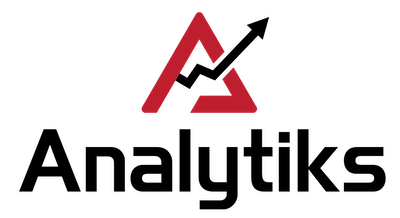</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Exercise: Predicting Student's Grade

<b>Dataset:</b> <i>xAPI-Edu-Data.csv</i><br>
<a href="https://www.kaggle.com/aljarah/xAPI-Edu-Data/downloads/students-academic-performance-dataset.zip/6">Description</a>

<b>Target Variable:</b> <i>Class</i> 
* L = Low
* M = Medium
* H = High

<b>Key Objectives:</b>
1. Convert Categorical to Numerical Data
2. Create a Parameter_Grid for GridSearch_CV and include the following parameters:
    1. n_estimators
    2. max_depth
    3. max_features
    4. min_samples_split
    5. min_samples_leaf
    6. bootstrap
    7. criterion
3. Create a Pipeline to Perform the following functions:
    1. Scaler: MinMax
    2. GridSearchCV 
    3. Classifier: RandomForestClassifier (random_state = 35)
4. Show the following results:
    1. Best Estimator
    2. Best Parameters
    3. Best Score
    4. Top 10 Feature Importance
    
<b><i>Bonus: Give 1 or 2 Insights that you can get from the Dataset</b></i>

## Import Libraries

### Standard Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

## Load dataset

In [6]:
#Provide the path of the dataset
df = pd.read_csv('../xAPI-Edu-Data.csv')

In [8]:
#Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [10]:
#Describe the Dataset (Objects Only)
df.describe(include='object')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [11]:
#Describe the Dataset (Numerical Data Only)
df.describe(include='number')

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### Separate predictor & target variables

In [ ]:
X=df_num.drop('Class',axis=1)
y=df_num['Class']

### Check class balance

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((360, 16), (120, 16), (360,), (120,))

## Convert the Categorical Data to Numerical

Hint: Use the "getdummies" function in pandas

In [55]:
#Convert the Categorical data to Numerical
df_num=pd.get_dummies(X)

In [81]:
#Inspect the Created DataFrame with all Numerical Values
df_num.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [114]:
df_num['Class']=df['Class']

In [116]:
df_num.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class
0,15,16,2,20,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,M
1,20,20,3,25,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,M
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,L
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,L
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,M


In [118]:
X=df_num.drop('Class', axis=1)
y=df_num['Class']

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=35)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((360, 72), (120, 72), (360,), (120,))

## Grid Search CV

### Create paramater dictionary for Grid Search of Random Forest Classifier
Refer to: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a> for parameters

In [124]:
param_grid_nopipe={
    'n_estimators':[10,11],
    'max_depth':[10,11],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False],
    'criterion':['gini','entropy']
}

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

In [126]:
GS=GridSearchCV(RandomForestClassifier(random_state=35),param_grid=param_grid_nopipe,cv=5)

### Setup Pipeline with Scaler, and Grid Search 

* Scaler: MinMax
* GridSearch
* Classifier: RandomForestclassifier (random_state=35)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [137]:
scaler=MinMaxScaler()
rf=RandomForestClassifier(random_state=35)

In [129]:
model=Pipeline([('scaler',scaler),('clf',GS)])

### Build model, following pipeline
Grid Search CV will build multiple models with different combinations of Random Forest parameters defined in param_grid

In [130]:
model.fit(X,y)

C:\Users\COBENA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
           ...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

### Show Results

### Print out the following:
* Best Estimator
* Best Parameters
* Best Score

In [134]:
print("Best estimator:")
print(GS.best_estimator_)
print("Best parameters:")
print(GS.best_params_)
print("Best score:")
print(GS.best_score_)

Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=35,
            verbose=0, warm_start=False)
Best parameters:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 10}
Best score:
0.7041666666666667


### Display the top 10 Feature Importance ranked from highest to lowest

In [141]:
rf_feat_imp = rf.fit(X,y).feature_importances_

feature_importance = pd.DataFrame(rf_feat_imp, index=X_train.columns, columns=["Feat_Imp"])
feature_importance.sort_values("Feat_Imp",ascending=False)

,Feat_Imp
VisITedResources,0.110768
raisedhands,0.107511
AnnouncementsView,0.094533
Discussion,0.084383
StudentAbsenceDays_Above-7,0.065527
StudentAbsenceDays_Under-7,0.063362
ParentAnsweringSurvey_Yes,0.062785
Relation_Father,0.028813
gender_M,0.019047
gender_F,0.017758


## Bonus: Give 1 or 2 Insights that you can get from the Dataset